In [2]:
%%time
##############################
##          IMPORTS         ##
##############################
# THIRD PARTY IMPORTS
# For arrays
import numpy as np
# For importing the data set
import pandas as pd
# For graphing
import matplotlib.pyplot as plt
# For calculating the r2 score
from sklearn.metrics import r2_score
# For imnporting files from other directories
import sys

# Directories to find data files and save images
data_dir = 'raw_data/'
images_dir = 'img/'

# LOCAL IMPORTS
# Local imports stored in this folder
sys.path.append('support_code/')
# For graphing functionality and error functions
from Analysis import *
# To generates the data file paths
from DataImportAndFormat import *
# To perform the bayesian extrapolation
from BayesianExtrapolation import *
from Regression import *

CPU times: user 76 µs, sys: 199 µs, total: 275 µs
Wall time: 290 µs


In [3]:
%%time
# The folders where the data is contained
folders = ["rs_0_05/", "rs_0_1/", "rs_0_25/", "rs_0_5/", "rs_0_75/", "rs_1/"]
# Save the number of neutrons after each run
numbers = []
# Collecte the predicted and true converged CCD correlation energies along
# with the uncertianities
data_collected = []
std_collected = []
# Perform the Gaussian process extrapolation on every data set and save the results
for folder in folders:
  sep = " "
  filenames, numbers = generate_filenames (data_dir + folder)
  filenames = filenames[:-1]
  numbers = numbers[:-1]
  data, std, errs = bayesian_ridge_regression_extrapolation (numbers, filenames, seq=2, start_dim=5,dim=21, isDisplay=False, isOld=False, sep=sep)
  data_collected.append(data)
  std_collected.append(std)
# Split the predictions from the true data and divide by N
predictions_collected = []
true_collected = []
numbers = np.asarray(numbers)
for data in data_collected:
    data = np.asarray(data)
    predictions_collected.append(data[:,1]/numbers)
    true_collected.append(data[:,0]/numbers)
# Divide the uncertainity by N as well
std_collected = [i/numbers for i in std_collected]

CPU times: user 4.13 s, sys: 32.6 ms, total: 4.16 s
Wall time: 4.18 s


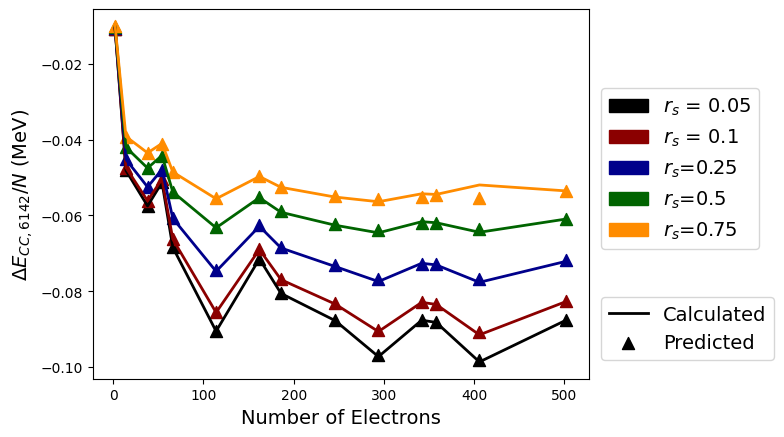

In [4]:
# Define the colors for the graphing and the data set labels
colors = ["black", "darkred", "darkblue", "darkgreen",  "darkorange", "purple"]
labels = [r"$r_s$ = 0.05",r"$r_s$ = 0.1",r"$r_s$=0.25",r"$r_s$=0.5",r"$r_s$=0.75",r"$r_s$=1.0"]
# Save the images here
savename = images_dir+"BRR_EG_MSU.pdf"
# Graph all of the true data and all of the predicted data with its uncertainities
va = VisualAnalysis()
va.graph_model_outputs_many (numbers, true_collected[:-1], predictions_collected[:-1],
                                               "Number of Electrons", r"$\Delta E_{CC,6142}/N$ (MeV)",
                                              colors[:-1], labels[:-1],savename, isDisplay=True)

In [5]:
# Calculate the RMSE error per density
ea = ErrorAnalysis()
densities = [0.05, 0.1, 0.25, 0.5, 0.75, 1.0]
for i in range(6):
    print("Density:", densities[i], "\t RMSE:", ea.rmse(predictions_collected[i], true_collected[i]), "\t Percent Error:",ea.percent_error(predictions_collected[i], true_collected[i]))
    print()

Density: 0.05 	 RMSE: 0.00015937265666808107 	 Percent Error: 0.11573925372119066

Density: 0.1 	 RMSE: 0.0002488867527203689 	 Percent Error: 0.19281905464131072

Density: 0.25 	 RMSE: 0.00035727604277609914 	 Percent Error: 0.3292566043798924

Density: 0.5 	 RMSE: 0.0003881171726606027 	 Percent Error: 0.43655737195291405

Density: 0.75 	 RMSE: 0.0009934586730783062 	 Percent Error: 0.8804841228973441

Density: 1.0 	 RMSE: 0.0008320592957425845 	 Percent Error: 0.8406875486664247



In [6]:
# And calculate the total RMSE error
print("Average RMSE:", ea.rmse(predictions_collected, true_collected))
print("Average Percent Error:",ea.percent_error(predictions_collected, true_collected))

Average RMSE: 0.0005837962225204807
Average Percent Error: 0.46592399270984614


In [7]:
for i in range(6):
    print(np.average(std_collected[i]))

-0.004585148730011327
-0.005101817705986321
-0.003482558520904097
-0.002627009305679517
-0.00223954750256825
-0.0021802679988306376


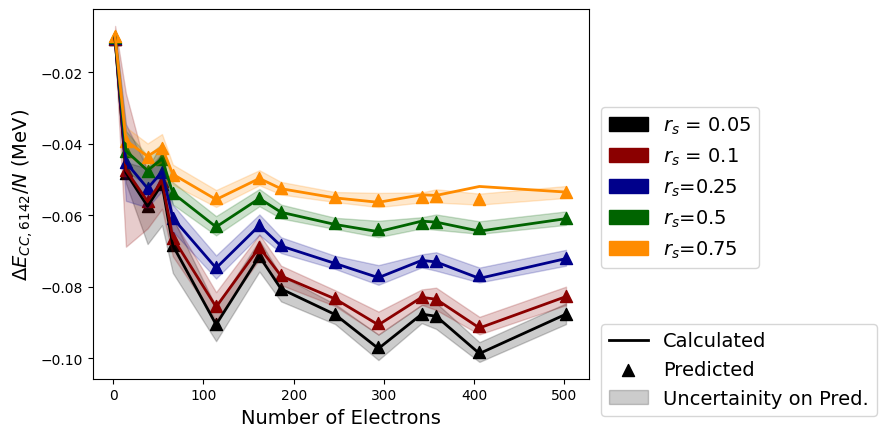

<Figure size 640x480 with 0 Axes>

In [8]:
# Define the colors for the graphing and the data set labels
colors = ["black", "darkred", "darkblue", "darkgreen",  "darkorange", "purple"]
labels = [r"$r_s$ = 0.05",r"$r_s$ = 0.1",r"$r_s$=0.25",r"$r_s$=0.5",r"$r_s$=0.75",r"$r_s$=1.0"]
# Save the images here
savename = images_dir+"BRR_EG_MSU_uncertainities.pdf"
# Graph all of the true data and all of the predicted data with its uncertainities
va = VisualAnalysis()
numbers = np.asarray(numbers)
va.graph_model_outputs_with_uncertainities_many (numbers, true_collected[:-1], predictions_collected[:-1], std_collected[:-1],
                                               "Number of Electrons", r"$\Delta E_{CC,6142}/N$ (MeV)",
                                              colors[:-1], labels[:-1],savename, isDisplay=True)
plt.savefig(images_dir+"BRR_EG_uncertainities_updated.pdf", dpi=1000)